In [49]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
factory = PokemonFactory()
ball_types = [ "pokeball", "ultraball", "fastball", "heavyball" ]

In [73]:
pokes = factory.create_all(level=100)

In [74]:
avg_per_poke = {}
for ball in ball_types:
    avg_per_poke[ball] = {}
    for poke in pokes:
        count = 0
        tot = 0
        for i in range(1, 1000):
            count += 1
            was_captured, capture_rate = attempt_catch(poke, ball)
            tot += was_captured
        avg_per_poke[ball][poke.name] = tot/count

avg_per_poke

{'pokeball': {'jolteon': 0.05305305305305305,
  'caterpie': 0.3233233233233233,
  'snorlax': 0.036036036036036036,
  'onix': 0.06806806806806807,
  'mewtwo': 0.003003003003003003},
 'ultraball': {'jolteon': 0.1031031031031031,
  'caterpie': 0.6666666666666666,
  'snorlax': 0.06806806806806807,
  'onix': 0.12712712712712712,
  'mewtwo': 0.005005005005005005},
 'fastball': {'jolteon': 0.23623623623623624,
  'caterpie': 0.3333333333333333,
  'snorlax': 0.031031031031031032,
  'onix': 0.056056056056056056,
  'mewtwo': 0.014014014014014014},
 'heavyball': {'jolteon': 0.035035035035035036,
  'caterpie': 0.3063063063063063,
  'snorlax': 0.1041041041041041,
  'onix': 0.07507507507507508,
  'mewtwo': 0.001001001001001001}}

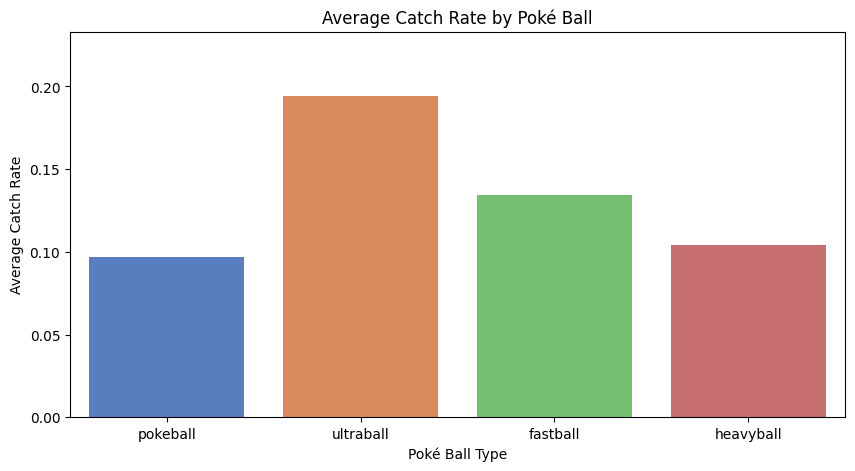

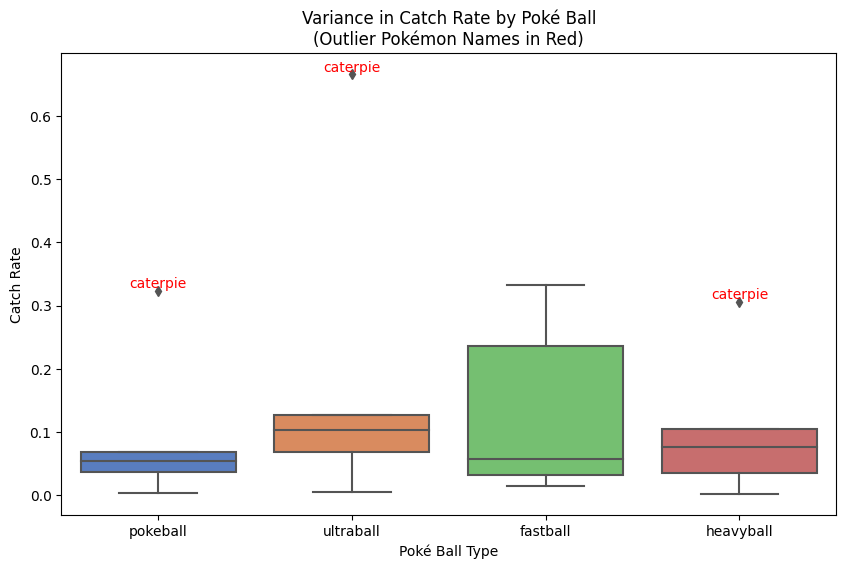

In [76]:
poke_names = []
catch_rates = []
ball_labels = []

for ball, pokes in avg_per_poke.items():
    for poke, rate in pokes.items():
        poke_names.append(poke)
        catch_rates.append(rate)
        ball_labels.append(ball)

# Create a DataFrame for Seaborn
df = pd.DataFrame({'Poké Ball': ball_labels, 'Catch Rate': catch_rates, 'Pokémon': poke_names})

# Calculate averages per ball
avg_rates = {ball: np.mean(list(avg_per_poke[ball].values())) for ball in ball_types}

# --- PLOT 1: Bar Chart (Average Catch Rate per Poké Ball) ---
plt.figure(figsize=(10, 5))
sns.barplot(x=list(avg_rates.keys()), y=list(avg_rates.values()), palette="muted")
plt.xlabel("Poké Ball Type")
plt.ylabel("Average Catch Rate")
plt.title("Average Catch Rate by Poké Ball")
plt.ylim(0, max(avg_rates.values()) * 1.2)  # Add some padding
plt.show()

# --- PLOT 2: Box Plot (Variance in Catch Rate) ---
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Poké Ball", y="Catch Rate", data=df, palette="muted")

# Identify Outliers
for ball in ball_types:
    ball_data = df[df['Poké Ball'] == ball]['Catch Rate']
    q1 = np.percentile(ball_data, 25)
    q3 = np.percentile(ball_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df['Poké Ball'] == ball) & ((df['Catch Rate'] < lower_bound) | (df['Catch Rate'] > upper_bound))]

    for _, row in outliers.iterrows():
        plt.text(ball_types.index(ball), row['Catch Rate'], row['Pokémon'], 
                 horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')

# Titles and Labels
plt.xlabel("Poké Ball Type")
plt.ylabel("Catch Rate")
plt.title("Variance in Catch Rate by Poké Ball\n(Outlier Pokémon Names in Red)")
plt.show()